# **Customer Credit Risk Analysis**

# Project Goals

We have to prepare a report for credit division of a bank. We will find out the effect of a customer's marital status and the number of children he has on the probability of default in repayment of the loan. The bank already has some data regarding the creditworthiness of customers.

Our report will be considered when making **credit assessment** for prospective customers. **Credit scoring** is used to evaluate the ability of potential borrowers to repay their loans.

The objective of this project is to prepare credit assessment reports on prospective customers for a bank's credit division. Credit scoring is used to evaluate the ability of potential borrowers to repay their loans. The task that will be tested is to find out the correlation of a customer's marital status and the number of children he has on the probability of default in repaying a loan.

## Open the data *file* and read the general information.


In [111]:
# Load all *library*
import pandas as pd
import numpy as py
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#for importing files to google collab
from google.colab import files

In [112]:
#upload datasets
#uploaded = files.upload()

In [113]:
# Load the data
df = pd.read_csv('/content/credit_scoring_eng.csv')

## **1. Data Exploration**

**Data Description**
- `children` - total number of children in a family
- `days_employed` - customer job experiences in day(s)
- `dob_years` - age of a customer in year(s)
- `education` - customer education level
- `education_id` - identifier for customer education level
- `family_status` - customer family status
- `family_status_id` - identifier for customer family status
- `gender` - customer gender
- `income_type` - customer income type
- `debt` - does the customer have loan payment debts?
- `total_income` - customer total income (monthly)
- `purpose` - customer purpose of getting a loan


In [114]:
# check how many data rows and columns in datasets
df.shape

(21525, 12)

In [115]:
# Show first 10 datarows
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


**Conclusions**

- There are missing values in the `days_employe` and '`total_income` columns. The total value does not match with another columns.
- There is a negative value in the `days_employed` column. The value must be changed to positive.
- There are duplicate values in the `education` column (there are uppercase and lowercase letters). The values must be adjusted to lowercase

In [116]:
# Show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Conclusions**

There are missing values in the `days_employed` and `total_income` columns. The total value does not match with another columns.

In [117]:
# Show filtered table with missing values on days_employed column
df[df['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Conclusions**

The total missing values are **2174** datarows.

In [118]:
# Check total missing value from datasets
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [119]:
df[ (df['days_employed'].isnull()) & (df['total_income'].isnull())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [120]:
df[ (df['days_employed'].isnull()) & (df['total_income'].isnull())].isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [121]:
# Sum up the missing values in percentage
df.isnull().sum() / len(df) * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

**Conclusions**

The number of rows in the table that has been filtered has matched with the number of missing values 21525 - 2174 = **19351**. When the `days_employed` column has a null value, the `total_income` column also has a null value.

The total percentage of missing values is 10%. This value is quite small if we compared with the complete datasets.

In the next step, we have to find out the possibilities that cause missing values.

In [122]:
# Check customers who have no data on identified characteristics and columns with missing values
df_null = df[ (df['days_employed'].isnull()) & (df['total_income'].isnull())].reset_index(drop=True)

In [123]:
df_null.shape

(2174, 12)

In [124]:
df_null.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [125]:
# check distribution from `children` column
df_null['children'].value_counts(normalize=True)

 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

**Conclusions**

The missing values were mostly dominated by **66%** customers who don't have children.

In [126]:
df_null['education'].value_counts(normalize=True)

secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
Some College           0.003220
SOME COLLEGE           0.003220
Primary Education      0.000460
PRIMARY EDUCATION      0.000460
Name: education, dtype: float64

**Conclusions**

The majority of missing values are dominated by **64%** by individuals with secondary education backgrounds.

In [127]:
df_null['education_id'].value_counts(normalize=True)

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64

**Conclusions**

The missing values were mostly dominated by **70%** `education_id` with value equals to 1.

In [128]:
df_null['gender'].value_counts(normalize=True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

**Conclusions**

The missing values were mostly dominated by **68%** customers with F (Female) gender.

In [129]:
df_null['family_status'].value_counts(normalize=True)

married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

**Conclusions**

The missing values were mostly dominated by **56%** customers that already married or `family_status = 'married'`.

In [130]:
df_null['income_type'].value_counts(normalize=True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

In [131]:
df[ (df['days_employed'].isnull()) & (df['total_income'].isnull())]['gender'].value_counts(normalize=True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

**Conclusions**

The missing values were mostly dominated by **50%** customers with job type as an employee or `income_type = 'employee'`, and this number were dominated by **68%** from female gender.

In [132]:
df_null['debt'].value_counts(normalize=True)

0    0.921803
1    0.078197
Name: debt, dtype: float64

**Conclusions**

The missing values were mostly dominated by **92%** customers who pay on time (with no debts) or `debt = 0`.

**Conclusions**

The missing values are mostly dominated by the following columns:
- 66% by customers who don't have children
- The majority of missing values are dominated by 64% by individuals with secondary education backgrounds.
- 68% by individuals with gender F (female)
- 56% by individuals who are married or with `family_status = 'married'`
- 50% by individuals with job type as an employee or with `income_type = 'employee'`
- 92% by individuals who pay on time (have no debt) or with debt = 0

**Possibilities that caused missing values in datasets**

It needs to be reviewed furthermore whether there is duplicate data or not, then whether there is a more specific pattern to be able to determine the cause of the missing data.

Let's try to check whether the missing values has random pattern

In [133]:
# check distribution in datasets
df['children'].value_counts(normalize=True)

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

- On `children` column, the values are slightly different from the data that has been filtered

In [134]:
df['education'].value_counts(normalize=True)

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: education, dtype: float64

- `education` column has data duplication

In [135]:
df['education_id'].value_counts(normalize=True)

1    0.707689
0    0.244367
2    0.034564
3    0.013101
4    0.000279
Name: education_id, dtype: float64

- `education_id` column has differences, there is a value with number 4. Because there is no data in `df_null`

In [136]:
df['gender'].value_counts(normalize=True)

F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

 - Kolom 'gender' terdapat gender XNA, data ini tidak masuk dengan data yg sudah di filter

In [137]:
df['income_type'].value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

- `income_type` column has some values (`unemployed`, `paternity` / `maternity leave`, and `student`) which are not found with filtered data

Cleansing data by excluding the following columns:
- XNA `gender`, the reason for this gender is unknown because there is only one data.
- children with a value less than 20, and greater than 0. Assuming there may be a typo when user input data

In [138]:
df_clean = df[(df['gender'] != 'XNA') & (df['children'] < 20) & (df['children'] > 0)]

In [139]:
df_clean

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
10,2,-4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


**Conclusions**

There is some similarities from the original datasets in compared with filtered table. We've to check whether there is data duplication, if there is some data duplication, we've to do data cleansing against the duplicated data


In [140]:
# Check pattern and another cause that will result in data missing values
df_null[df_null['income_type']=='employee']['children'].value_counts(normalize=True)

 0     0.589140
 1     0.252489
 2     0.123982
 3     0.026244
 4     0.003620
 20    0.002715
 5     0.000905
-1     0.000905
Name: children, dtype: float64

In [141]:
df[df['income_type']=='employee']['children'].value_counts(normalize=True)

 0     0.593579
 1     0.259646
 2     0.118446
 3     0.018797
 20    0.003867
 4     0.002788
-1     0.002338
 5     0.000540
Name: children, dtype: float64

In [142]:
# Check another pattern
df_null['education'].value_counts(normalize=True)

secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
Some College           0.003220
SOME COLLEGE           0.003220
Primary Education      0.000460
PRIMARY EDUCATION      0.000460
Name: education, dtype: float64

In [143]:
df['education'].value_counts(normalize=True)

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: education, dtype: float64

- There is a pattern on missing values

**Conclusions**

There is no specific pattern from unfiltered data and filtered data

The missing value may occur randomly or it may happen due to human error when user input data, therefore we must fill in the missing values with **mean** or **median**.

We have to adjust the value of duplicate data. For abnormal data, or has no value, we must fill in the value with the **mean** or **median**

## Data Transformation



In [144]:
df.duplicated().sum()

54

In [145]:
df_new = df.drop_duplicates().reset_index(drop=True)

In [146]:
df_new.duplicated().sum()

0

In [147]:
# check all values in `education` column to review spelling that must be fixed
df_new['education'].value_counts()

secondary education    13705
bachelor's degree       4710
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        273
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [148]:
# Fix spelling if needed
df_new['education'] = df_new['education'].str.lower()

In [149]:
# check all column value to ensure that we have fixed it properly
df_new['education'].value_counts()

secondary education    15188
bachelor's degree       5251
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

check `children` column

In [150]:
# check value distribution on `children` column
df_new['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

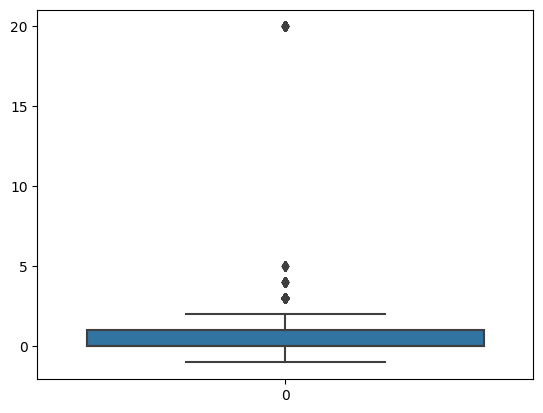

In [151]:
sns.boxplot(df_new['children']);


Yes, there are values 20 and -1. However, based on research, humans can have up to 15-20 children, so 20 is not an abnormal data.

Source: https://www.businessinsider.com/how-many-children-you-can-have-lifetime-2018-11



**Conclusions**

we will only replace the negative value to be absolute (positive)

In [152]:
# fix data based on research
df_new['children'] = df_new['children'].replace(-1, 1)

In [153]:
# re-check `children` column to ensure that everything has been fixed
df_new['children'].value_counts()

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Check data on `days_employed` column

In [154]:
# Find the problematic data in `days_employed`, if there is a problem, and calculate how much the percentage
df_new['days_employed'].value_counts()

-8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

If the amount of problematic data is high, it may be caused by some technical problems. We probably need to propose the clearest reason why this could be and how the data should be corrected, please note that we can't delete these problematic rows.

In [155]:
# Fix the problematic values, if exists
# The solution is to absolute its value
df_new['days_employed'] = df_new['days_employed'].abs()

In [156]:
# check the result, ensure the problem has already been fixed
df_new['days_employed'].value_counts()

8437.673028      1
3507.818775      1
354500.415854    1
769.717438       1
3963.590317      1
                ..
1099.957609      1
209.984794       1
398099.392433    1
1271.038880      1
1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

In [157]:
# ensure there is no more negative value
df_new[df_new['days_employed'] < 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [158]:
df_new['years_employed'] = df_new['days_employed'] / 365

In [159]:
df_new.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814


Now let's look at the customer's age and check if there is an issue there. Again, think about what possible abnormalities we could encounter in this column, such as age numbers that doesn't make sense.

In [160]:
# check `dob_years` for suspected value and show how much the percentage
sorted(df_new['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

Decide what you will do with the problematic value and explain why.

In [161]:
# Fix the problem on `dob_years` column, if the problem exists
df_new[df_new['dob_years']==0].shape

(101, 13)

- There are 101 rows with 0 value

In [162]:
df_new_2 = df_new[df_new['dob_years']!=0].reset_index(drop=True)

In [163]:
df_new_2

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21365,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087
21366,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258
21367,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991
21368,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347


- Filter rows with condition not equals to 0

In [164]:
# check the result, ensure all the issue has been fixed
sorted(df_new_2['dob_years'].unique())

[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

- `dob_years` data with 0 value has been removed completely

Now it's time to check the `family_status` column. Check what kind of values are contained in this column and what issues you might need to address.

In [165]:
# check values on 'family_status' column
df_new_2['family_status'].value_counts()

married              12295
civil partnership     4142
unmarried             2794
divorced              1185
widow / widower        954
Name: family_status, dtype: int64

- There is no abnormal data in the `family_status` column, so, we don't need to do a data cleansing

Now it's time to check the `gender` column. Check what kind of values are contained in this column and what issues you might need to address

In [166]:
# check values on 'gender' column
df_new_2['gender'].value_counts()

F      14117
M       7252
XNA        1
Name: gender, dtype: int64

- There is only 1 row data with XNA value

In [167]:
drop_index = df_new_2[df_new_2['gender']=='XNA'].index

In [168]:
# Fix the problematic values, if exists
df_new_3 = df_new_2.drop(drop_index).reset_index(drop=True)

In [169]:
df_new_3

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21364,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087
21365,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258
21366,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991
21367,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347


In [170]:
# check the result, ensure that everything has been fixed
df_new_3.drop(drop_index)['gender'].value_counts()

F    14116
M     7252
Name: gender, dtype: int64

- Data with XNA value already removed

Now it's time to examine the `income_type` column. Check what kind of values are contained in this column and what issues you might need to address

In [171]:
# check values on 'income_type' column
df_new_3['income_type'].value_counts()

employee                       11036
business                        5059
retiree                         3817
civil servant                   1451
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

- There is no abnormal data in the `income_type` column, so, we don't need to do a data cleansing

Now it's time to see if there are any duplicates in our data. If we find one, you must decide what you will do with the duplicate and explain why.

- The duplicate part already been fixed on point no 2 on Data Exploration

In [172]:
# check dataset size that we've got now after data manipulation that we've been through
df_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21369 entries, 0 to 21368
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21369 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21369 non-null  int64  
 3   education         21369 non-null  object 
 4   education_id      21369 non-null  int64  
 5   family_status     21369 non-null  object 
 6   family_status_id  21369 non-null  int64  
 7   gender            21369 non-null  object 
 8   income_type       21369 non-null  object 
 9   debt              21369 non-null  int64  
 10  total_income      19259 non-null  float64
 11  purpose           21369 non-null  object 
 12  years_employed    19259 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


- We have dropped data with abnormal values. But empty data still exists, then we have to fill in the empty data with fillna

# Work with missing values

To speed things up with a large amount of data, you may want to use a *dictionary* for multiple values that have an ID. Explain why and what *dictionary* you will use.

In [173]:
# find the dictionary
# Note: find out inter-column mapping
dict_edu = df_new_3[['education_id', 'education']].drop_duplicates().reset_index(drop=True)

In [174]:
dict_edu.to_dict(orient='records')

[{'education_id': 0, 'education': "bachelor's degree"},
 {'education_id': 1, 'education': 'secondary education'},
 {'education_id': 2, 'education': 'some college'},
 {'education_id': 3, 'education': 'primary education'},
 {'education_id': 4, 'education': 'graduate degree'}]

In [175]:
dict_family = df_new_3[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)

In [176]:
dict_family.to_dict(orient='records')

[{'family_status_id': 0, 'family_status': 'married'},
 {'family_status_id': 1, 'family_status': 'civil partnership'},
 {'family_status_id': 2, 'family_status': 'widow / widower'},
 {'family_status_id': 3, 'family_status': 'divorced'},
 {'family_status_id': 4, 'family_status': 'unmarried'}]

### Fix missing value in `total_income` column

Briefly describe which column with missing values you need to work with. Describe how you would fix it.

Start by working out the total lost income value. Create an age category for the customer. Create a new column that contains age category. This strategy can help to calculate the total revenue value.


In [177]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [178]:
# write a function to calculate age category
def age_group(age):
    try:
        if age <= 17:
            return 'Teenager'
        elif 18 <= age <= 30:
            return 'Mature'
        elif 31 <= age <= 59:
            return 'Senior'
        else:
            return 'Old'
    except:
        return 'Not Specified'

In [179]:
# test the function, is it works or not
df_new_3['dob_years'] = df_new_3['dob_years'].replace(42, '42 Tahun')

In [180]:
# create a new column based on function
df_new_3['age_category'] = df_new_3['dob_years'].apply(age_group)

In [181]:
# review value in new column
df_new_3['age_category'].value_counts()

Senior           14549
Mature            3718
Old               2506
Not Specified      596
Name: age_category, dtype: int64

Think about everything that usually depends on income. Eventually, you'll find out whether you should use the mean or the median to replace the missing values. To make this decision, you may want to look at the distribution of the data that you already identify as impacted a person's income.

Create a table that contain only data with no missing values. This data will be used to fix missing values.

In [182]:
# create table without missing value and show several datarows to ensure everything goes well
df_not_null = df[df['total_income'].notnull()].reset_index(drop=True)

In [183]:
df_not_null

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
19346,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
19347,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
19348,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
19349,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [184]:
# check the mean value for income based on asumption
df_not_null.groupby('gender')['total_income'].mean()

gender
F      24655.604757
M      30907.144369
XNA    32624.825000
Name: total_income, dtype: float64

In [185]:
# check the median value for income based on asumption
df_not_null.groupby('gender')['total_income'].median()

gender
F      21464.845
M      26834.295
XNA    32624.825
Name: total_income, dtype: float64

- mean has fragile characteristic / can get easily infuenced by outliers
- meadian has robust characteristic / can't get easily infuenced by outliers

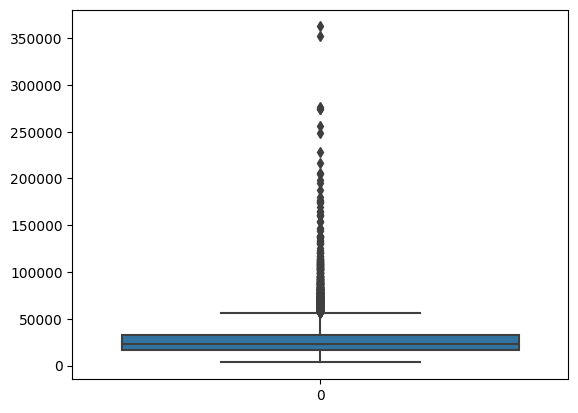

In [186]:
sns.boxplot(df_new['total_income']); #check outliers on total_income column

- If there are too many outliers like above sample, you can use the median.
- If there are only a few outliers, you can use the mean.

Repeat the comparison for several things. Make sure you consider various aspects and explain your thought process.

Make a decision about the characteristics that has the most determine an income and whether to use the median or the average. Explain why you made this decision


In [187]:
# Write the function that can be used to fill in the missing values
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [188]:
df_new_3.isnull().sum()

children               0
days_employed       2110
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2110
purpose                0
years_employed      2110
age_category           0
dtype: int64

- Check for null value in the recent dataframe

In [189]:
# check values in the newly created column
df_new_4 = fill_missing_value (df_new_3, 'age_category', 'total_income')

In [190]:
# Apply the function to each row
df_new_4.isnull().sum()

children               0
days_employed       2110
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
years_employed      2110
age_category           0
dtype: int64

- The total income is no longer has null value (already filled)

In [191]:
# check if we found an error
df_new_4[df_new_4['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,19761.425,to have a wedding,NaN,Old
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,23857.908,education,NaN,Senior
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,19761.425,building a real estate,NaN,Old
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,23857.908,second-hand car purchase,NaN,Senior
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,23857.908,to have a wedding,NaN,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,2,NaN,47,secondary education,1,married,0,M,business,0,23857.908,purchase of a car,NaN,Senior
21339,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,23857.908,wedding ceremony,NaN,Senior
21341,0,NaN,48,bachelor's degree,0,married,0,F,business,0,23857.908,building a property,NaN,Senior
21346,1,NaN,42 Tahun,secondary education,1,married,0,F,employee,0,25466.879,building a real estate,NaN,Not Specified


- All rows in `total_income` already filled with median value

Once we are done with `total income`, check if the sum of the values in this column matches with the sum of the values in other columns.

In [192]:
# check total entries in columns
df_new_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21369 entries, 0 to 21368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21369 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21369 non-null  object 
 3   education         21369 non-null  object 
 4   education_id      21369 non-null  int64  
 5   family_status     21369 non-null  object 
 6   family_status_id  21369 non-null  int64  
 7   gender            21369 non-null  object 
 8   income_type       21369 non-null  object 
 9   debt              21369 non-null  int64  
 10  total_income      21369 non-null  float64
 11  purpose           21369 non-null  object 
 12  years_employed    19259 non-null  float64
 13  age_category      21369 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 2.3+ MB


- Yes, the total `income_column` values are the same as the other columns

### Fixed the value in `days_employed`

Think about parameters that can help us correct missing values in this column. Eventually, we'll find out whether we should use the mean or the median to replace the missing values. We may need to do the same research we did when correcting the data in the previous column.

In [193]:
# The median distribution of `days_employed` based on the parameters we identified
df_new_4['days_employed'].median()

2197.320349646864

In [194]:
# The mean distribution of `days_employed` based on the parameters we identified
df_new_4['days_employed'].mean()

66905.78923678081

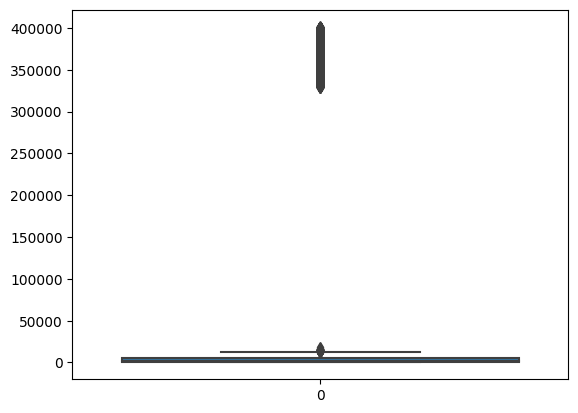

In [195]:
sns.boxplot(df_new['days_employed']); #check outliers in the days_employed column

[Tentukan apa yang akan Anda gunakan: rata-rata atau median. Jelaskan mengapa.]

- I used median values, because there are too many outliers

In [196]:
# write a function that calculates the mean or median based on the parameters we identified
df_new_5 = fill_missing_value (df_new_4, 'age_category', 'days_employed')
df_new_5.isnull().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
years_employed      2110
age_category           0
dtype: int64

In [197]:
# check the function to ensure it works well
df_new_5[df_new_5['years_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
12,0,355229.618218,65,secondary education,1,civil partnership,1,M,retiree,0,19761.425,to have a wedding,NaN,Old
26,0,2288.041199,41,secondary education,1,married,0,M,civil servant,0,23857.908,education,NaN,Senior
29,0,355229.618218,63,secondary education,1,unmarried,4,F,retiree,0,19761.425,building a real estate,NaN,Old
41,0,2288.041199,50,secondary education,1,married,0,F,civil servant,0,23857.908,second-hand car purchase,NaN,Senior
55,0,2288.041199,54,secondary education,1,civil partnership,1,F,retiree,1,23857.908,to have a wedding,NaN,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,2,2288.041199,47,secondary education,1,married,0,M,business,0,23857.908,purchase of a car,NaN,Senior
21339,1,2288.041199,50,secondary education,1,civil partnership,1,F,employee,0,23857.908,wedding ceremony,NaN,Senior
21341,0,2288.041199,48,bachelor's degree,0,married,0,F,business,0,23857.908,building a property,NaN,Senior
21346,1,2253.981630,42 Tahun,secondary education,1,married,0,F,employee,0,25466.879,building a real estate,NaN,Not Specified


- Yes, the values for the days_employed column are the same as for the other columns

- There is no missing value in `income_type`, so there is no need to fill in a new value in the column

Once you are done with `total income`, check if the sum of the values in this column matches with the sum of the values in the other columns.

In [198]:
# Check entries in all columns - make sure we fix all missing values
df_new_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21369 entries, 0 to 21368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21369 non-null  int64  
 1   days_employed     21369 non-null  float64
 2   dob_years         21369 non-null  object 
 3   education         21369 non-null  object 
 4   education_id      21369 non-null  int64  
 5   family_status     21369 non-null  object 
 6   family_status_id  21369 non-null  int64  
 7   gender            21369 non-null  object 
 8   income_type       21369 non-null  object 
 9   debt              21369 non-null  int64  
 10  total_income      21369 non-null  float64
 11  purpose           21369 non-null  object 
 12  years_employed    19259 non-null  float64
 13  age_category      21369 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 2.3+ MB


- All column values have been filled in. `years_employed` is a new field, so it can be skipped

## Categorized Data

To answer questions and test hypothesis, we will work with data that has been categorized. Take a look at the questions that will be asked and that we had to answer. Think about which data needs to be categorized to answer these questions. On below, we'll find templates we can use to categorize data. The first process includes text data; the second addresses numerical data that needs to be categorized. We can use both suggested hints or neither - we're free to choose.

Regardless of our decision to overcome categorization, make sure that we clearly explain why we made that decision. Remember: this is our job and we are the one who has the right to make all the decisions.


In [199]:
# show data values that we already chosen for categorization
# categories can be divided based on total_income, purpose (no more than 5 types of categories)
df_new_5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42 Tahun,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Not Specified
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Senior
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Senior
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Senior
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,Senior


check unique values

In [200]:
# check unique values
sorted(df_new['purpose'].unique())

['building a property',
 'building a real estate',
 'buy commercial real estate',
 'buy real estate',
 'buy residential real estate',
 'buying a second-hand car',
 'buying my own car',
 'buying property for renting out',
 'car',
 'car purchase',
 'cars',
 'construction of own property',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'housing',
 'housing renovation',
 'housing transactions',
 'profile education',
 'property',
 'purchase of a car',
 'purchase of my own house',
 'purchase of the house',
 'purchase of the house for my family',
 'real estate transactions',
 'second-hand car purchase',
 'supplementary education',
 'to become educated',
 'to buy a car',
 'to get a supplementary education',
 'to have a wedding',
 'to own a car',
 'transactions with commercial real estate',
 'transactions with my real estate',
 'university education',
 'wedding ceremony']

Which primary group can we identify based on their unique value?

- it's `purpose` group

We will categorize our data based on these topics.


In [218]:
# write a function to categorize data by common topics
def categorize_purpose(row):
	if 'car' in row:
		return 'car'
	elif 'hous' in row or 'prop' in row or 'real est' in row:
		return 'real estate'
	elif 'wedd' in row:
		return 'wedding'
	elif 'educ' in row or 'uni' in row:
		return 'education'
	else:
		return 'Unidentified'

In [202]:
# Create a column that contains categories and calculate the values
df_new_5['categorize_purpose'] = df_new_5['purpose'].apply(categorize_purpose)

If we decide to categorize numeric data, we also have to create categories for the data.

In [203]:
# check all numeric data in the column that we've selected for categorization
df_new_5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category,categorize_purpose
0,1,8437.673028,42 Tahun,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Not Specified,real estate
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Senior,car
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Senior,real estate
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Senior,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,Senior,wedding


In [204]:
# make a statistical conclusions for the column
df_new_5['categorize_purpose'].value_counts()

real estate    10766
car             4286
education       3996
wedding         2321
Name: categorize_purpose, dtype: int64

Decide what range we will use for clustering and explain why.

In [205]:
# Create a function that performs categorizing data into different numeric groups based on range
def income_level(income):
	if (income > 5000) and (income <= 10000):
		return 'small'
	if (income > 10000) and (income <= 15000):
		return 'average'
	if (income > 20000) and (income <= 25000):
		return 'above average'
	if (income > 25000) and (income <= 50000):
		return 'high'
	if income > 50000:
		return 'very high'

In [206]:
# create a new column to load category
df_new_5['income_level'] = df_new_5['total_income'].apply(income_level)

In [207]:
# Count each category value to see its distribution
df_new_5['income_level'].value_counts()

high             7305
above average    5163
average          2802
very high        1318
small             895
Name: income_level, dtype: int64

## Check the hypothesis


**Is there a correlation between having children and paying off on time?**

In [208]:
# Check the child data and repayment on time data
ch_debt_0 = df_new_5.loc[(df_new_5['debt'] == 0), 'children'].value_counts()
# count customer that failed to pay based on total child
ch_debt_1 = df_new_5.loc[(df_new_5['debt'] == 1), 'children'].value_counts()
ch_debt_0, ch_debt_1

(0     12979
 1      4398
 2      1845
 3       301
 20       67
 4        37
 5         9
 Name: children, dtype: int64,
 0     1058
 1      442
 2      194
 3       27
 20       8
 4        4
 Name: children, dtype: int64)

In [209]:
df_new_5.groupby('debt')['children'].value_counts(normalize=True)

debt  children
0     0           0.660980
      1           0.223976
      2           0.093960
      3           0.015329
      20          0.003412
      4           0.001884
      5           0.000458
1     0           0.610502
      1           0.255049
      2           0.111945
      3           0.015580
      20          0.004616
      4           0.002308
Name: children, dtype: float64

In [210]:
df_new_5['debt'].value_counts(normalize=True)

0    0.918901
1    0.081099
Name: debt, dtype: float64

**Conclusion**

- In total, there are around 8% of individuals have failed to pay. And, the highest number of failed to pay is dominated by 61% by individuals who do not have children

**Is there a correlation between family status and repayment on time?**

In [211]:
# check data from `family_status` and repayment on time
fam_debt_0 = df_new_5.loc[(df_new_5['debt'] == 0), 'family_status'].value_counts()
# counts failed to pay based on family status
fam_debt_1 = df_new_5.loc[(df_new_5['debt'] == 1), 'family_status'].value_counts()
fam_debt_0, fam_debt_1

(married              11368
 civil partnership     3755
 unmarried             2521
 divorced              1100
 widow / widower        892
 Name: family_status, dtype: int64,
 married              927
 civil partnership    386
 unmarried            273
 divorced              85
 widow / widower       62
 Name: family_status, dtype: int64)

In [212]:
df_new_5.groupby('debt')['family_status'].value_counts(normalize=True)

debt  family_status    
0     married              0.578937
      civil partnership    0.191230
      unmarried            0.128387
      divorced             0.056020
      widow / widower      0.045427
1     married              0.534911
      civil partnership    0.222735
      unmarried            0.157530
      divorced             0.049048
      widow / widower      0.035776
Name: family_status, dtype: float64

In [213]:
df_new_5['debt'].value_counts(normalize=True)

0    0.918901
1    0.081099
Name: debt, dtype: float64

**Conclusion**

- In total, there is around 8% of individuals that have failed to pay. And, the highest number of this were dominated by 53% from individuals who already been married or family status 'married'

**Is there a correlation between income levels and repayment on time?**

In [214]:
# Check on income rate data and repayment on time
inc_debt_0 = df_new_5.loc[(df_new_5['debt'] == 0), 'income_type'].value_counts()
# counts on failed to pay data based on income type
inc_debt_1 = df_new_5.loc[(df_new_5['debt'] == 1), 'income_type'].value_counts()
inc_debt_0, inc_debt_1

(employee         9981
 business         4684
 retiree          3602
 civil servant    1365
 entrepreneur        2
 student             1
 unemployed          1
 Name: income_type, dtype: int64,
 employee                       1055
 business                        375
 retiree                         215
 civil servant                    86
 unemployed                        1
 paternity / maternity leave       1
 Name: income_type, dtype: int64)

In [215]:
df_new_5.groupby('debt')['income_type'].value_counts(normalize=True)

debt  income_type                
0     employee                       0.508301
      business                       0.238541
      retiree                        0.183439
      civil servant                  0.069515
      entrepreneur                   0.000102
      student                        0.000051
      unemployed                     0.000051
1     employee                       0.608771
      business                       0.216388
      retiree                        0.124062
      civil servant                  0.049625
      paternity / maternity leave    0.000577
      unemployed                     0.000577
Name: income_type, dtype: float64

In [216]:
df_new_5['debt'].value_counts(normalize=True)

0    0.918901
1    0.081099
Name: debt, dtype: float64

**Conclusion**

- In total, there is around 8% of individuals have been failed to pay. And, the largest number of this were dominated by 60% from individuals with a profession as employees

**How do credit goals affect failed to pay rates?**

In [217]:
# Check the failed to pay rate percentage for each credit purpose and perform analysis
pur_debt_1 = df_new_5.loc[(df_new_5['debt'] == 1), 'categorize_purpose'].value_counts(normalize=True)
pur_debt_1

real estate    0.449510
car            0.230814
education      0.213503
wedding        0.106174
Name: categorize_purpose, dtype: float64

**Conclusion**

- In total, there is around 44% default cases for credit purposes in the real estate category. It is possible that it was triggered by long-term credit which led to over credit to third parties, or an increase in the benchmark interest rate which resulted in an increasing credit interest on real estate.

# **Final Conclusions**

- Based on the datasets we used, there are around 21525 rows of data, where 10% of the data has missing values in the `days_employed` and `total_income` columns. Then, duplicate data was also found in the `education` column. It is possible that this could be triggered due to a human error or due to certain conditions. As a solution, I did a boxplot analysis to find out the number of outliers in the data. Because the missing values has a large outliers, I replaced the data using median value. And for duplicate data, I convert it to lowercase.

- Pertanyaan yg diajukan sebenarnya sudah cukup umum ketika kita mendapatkan suatu data, dan untuk mengolah data tsb menjadi suatu data yg bermanfaat sehingga memiliki informasi penting didalamnya.

- The questions that were asked are actually quite general when we receive the datasets, and to process the data into a useful data that has important information in it.
